In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Reading data

In [2]:
city = pd.read_csv('man_city_17_18_19.csv')

In [3]:
city.head()

,Season,Matchday,Opponent,Minute,Player,Outcome,Distance,BodyPart,Notes,SCA1,SCA1Event,SCA2,SCA2Event
0,2017/18,1,Brighton & Hove Albion,4,Gabriel Jesus,Blocked,11,Right Foot,NaN,Fernandinho,Pass (Live),Kyle Walker,Pass (Live)
1,2017/18,1,Brighton & Hove Albion,9,Danilo,Off Target,21,Right Foot,NaN,David Silva,Pass (Live),Danilo,Pass (Live)
2,2017/18,1,Brighton & Hove Albion,14,Fernandinho,Off Target,10,Head,NaN,David Silva,Pass (Dead),NaN,NaN
3,2017/18,1,Brighton & Hove Albion,17,Kevin De Bruyne,Saved,27,Right Foot,Free kick,David Silva,Fouled,Fernandinho,Pass (Live)
4,2017/18,1,Brighton & Hove Albion,32,Kevin De Bruyne,Blocked,28,Right Foot,Free kick,David Silva,Fouled,Danilo,Pass (Live)


In [4]:
print(city.Season.value_counts())
print(city.Matchday.nunique())

2019/20    376
2018/19    346
2017/18    338
Name: Season, dtype: int64
19


Data only for two halves of two seasons. Getting shots per searson.

In [5]:
y17 = city.query("Season == '2017/18'")['Distance']

In [6]:
y18 = city.query("Season == '2018/19'")['Distance']

In [7]:
y19 = city.query("Season == '2019/20'")['Distance']

In [8]:
from matplotlib import pyplot as plt
plt.style.use('Solarize_Light2')
# plt.style.use('seaborn-poster')
%config InlineBackend.figure_format = 'retina'
# plt.style.use("ggplot")
import seaborn as sns

# Comparing two samples

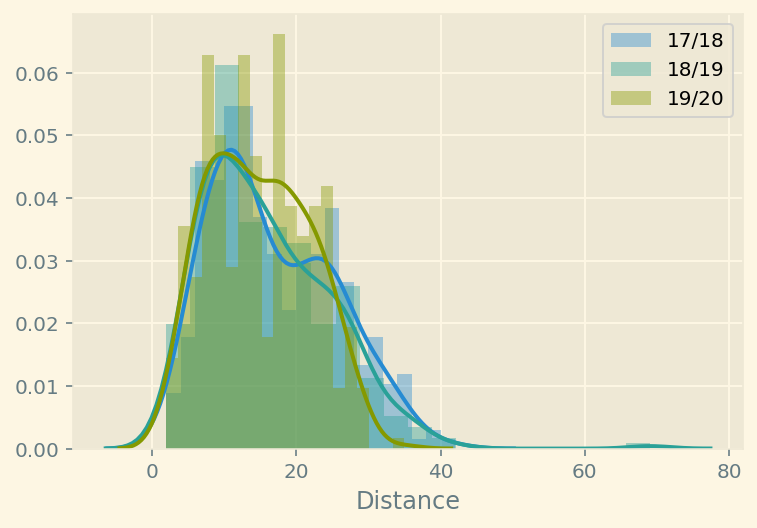

In [9]:
sns.distplot(y17, 20, label='17/18')
sns.distplot(y18, 20, label='18/19')
sns.distplot(y19, 20, label='19/20')
plt.legend()

In [10]:
y17.mean(), y17.std()

(16.701183431952664, 8.510914536706341)

In [11]:
y18.mean(), y18.std()

(15.95086705202312, 8.779779921952814)

In [12]:
y19.mean(), y19.std()

(14.872340425531915, 6.962733627998998)

In [13]:
# equal_var=False to perform welch's test instead, because of different variance and amount of sample
print(f'season 17/18 vs 18/19: {stats.ttest_ind(y17,y18, equal_var=False)}')
print(f'season 18/19 vs 19/20: {stats.ttest_ind(y18,y19, equal_var=False)}')
print(f'season 17/18 vs 19/20: {stats.ttest_ind(y17,y19, equal_var=False)}')

season 17/18 vs 18/19: Ttest_indResult(statistic=1.1348979627228202, pvalue=0.2568168035045629)
season 18/19 vs 19/20: Ttest_indResult(statistic=1.8185721011018878, pvalue=0.06943167359879912)
season 17/18 vs 19/20: Ttest_indResult(statistic=3.1215926762079387, pvalue=0.0018782472078475076)


Looks like there is a high chance of difference between them.

# Density distribution

In [14]:
kde17 = stats.gaussian_kde(y17)
kde18 = stats.gaussian_kde(y18)
kde19 = stats.gaussian_kde(y19)
grid = np.linspace(0,50, 51)


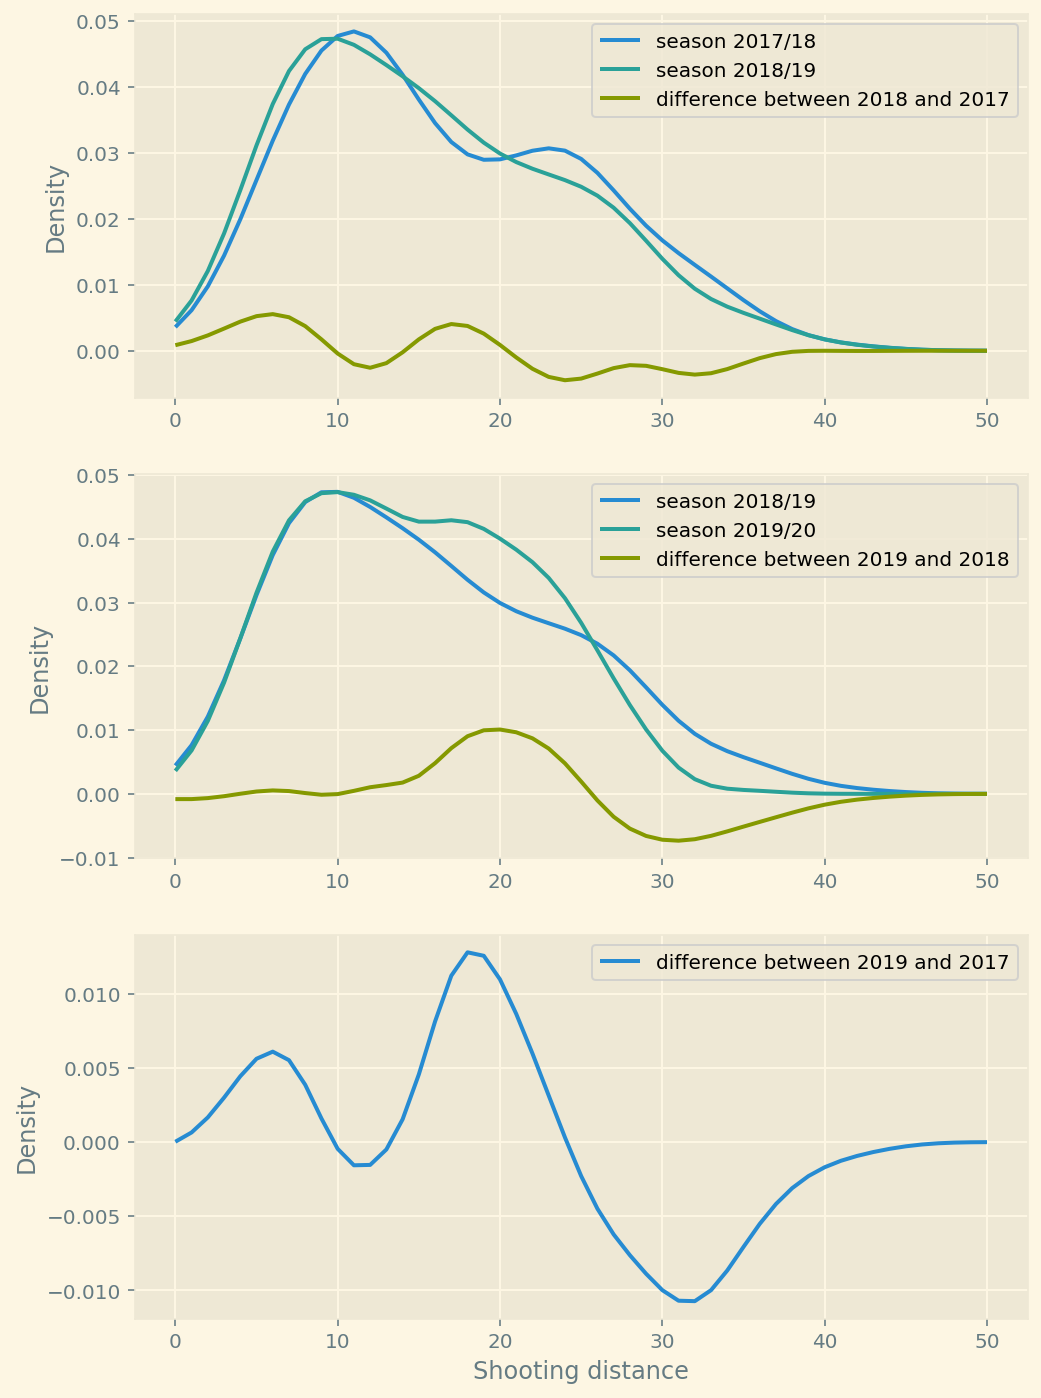

In [18]:
f, axs = plt.subplots(3,1, figsize=(8,12))

axs[0].plot(grid, kde17(grid), label="season 2017/18")
axs[0].plot(grid, kde18(grid), label="season 2018/19")
axs[0].plot(grid, kde18(grid)-kde17(grid), label="difference between 2018 and 2017")

axs[1].plot(grid, kde18(grid), label="season 2018/19")
axs[1].plot(grid, kde19(grid), label="season 2019/20")
axs[1].plot(grid, kde19(grid)-kde18(grid), label="difference between 2019 and 2018")

# axs[2].plot(grid, kde17(grid), label="season 2017/18")
# axs[2].plot(grid, kde19(grid), label="season 2019/20")
axs[2].plot(grid, kde19(grid)-kde17(grid), label="difference between 2019 and 2017")

for ax in axs:
    ax.set(ylabel='Density')
    ax.legend()

axs[2].set(xlabel='Shooting distance')
plt.show()

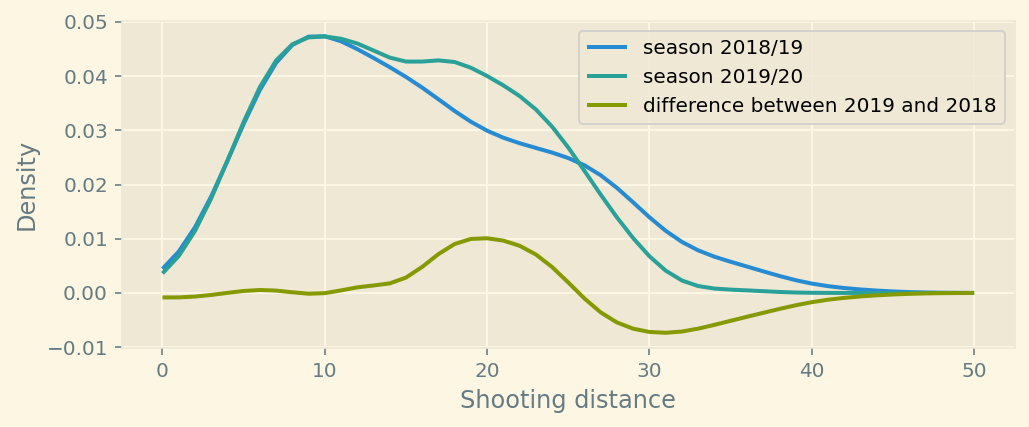

In [22]:
plot = plt.figure(figsize=(8,3))
plt.plot(grid, kde18(grid), label="season 2018/19", figure=plot)
plt.plot(grid, kde19(grid), label="season 2019/20", figure=plot)
plt.plot(grid, kde19(grid)-kde18(grid), label="difference between 2019 and 2018")
plt.xlabel('Shooting distance')
plt.ylabel('Density')
plt.legend()
plt.show()

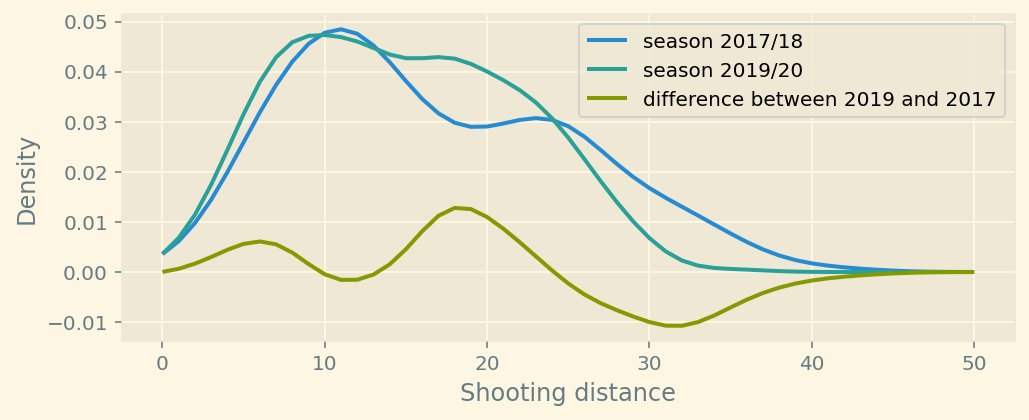

In [24]:
plot = plt.figure(figsize=(8,3))
plt.plot(grid, kde17(grid), label="season 2017/18", figure=plot)
plt.plot(grid, kde19(grid), label="season 2019/20", figure=plot)
plt.plot(grid, kde19(grid)-kde17(grid), label="difference between 2019 and 2017")
plt.xlabel('Shooting distance')
plt.ylabel('Density')
plt.legend()
plt.show()

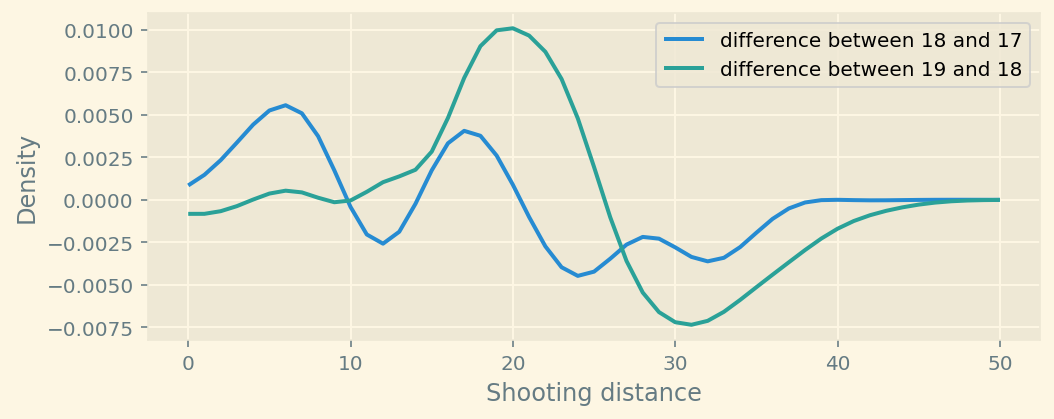

In [25]:
plot = plt.figure(figsize=(8,3))
plt.plot(grid, kde18(grid)-kde17(grid), label="difference between 18 and 17", figure=plot)
plt.plot(grid, kde19(grid)-kde18(grid), label="difference between 19 and 18")
# plt.plot(grid, kde19(grid)-kde17(grid), label="difference between 19 and 17")
plt.xlabel('Shooting distance')
plt.ylabel('Density')
plt.legend()
plt.show()

You can see the difference after plotting estimated densities. 

Manchester City has started shooting more from the 5-10 and 15-20 yards range. They shoot less from > 30 yards.

Text(0.5, 1.0, 'a-b')

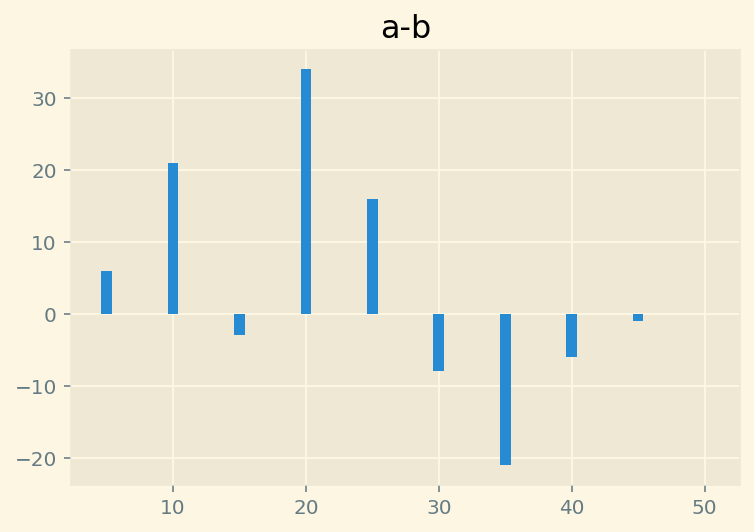

In [26]:
 diff=plt.bar(range(5,51,5), 
             height=(np.histogram(y19,bins=10, range=(0,50))[0] - np.histogram(y17,bins=10, range=(0,50))[0])
             ) 
 plt.title("a-b")

Here is the difference between histograms.

In [28]:
df=pd.DataFrame([
        np.histogram(y17,5,(0,50))[0] / y17.count() * 100,
        np.histogram(y18,5,(0,50))[0] / y18.count() * 100,
        np.histogram(y19,5,(0,50))[0] / y19.count() * 100
        ], index=['2017','2018','2019'], columns=['0-10','10-20','20-30','30-40','40-50'])

,0-10,10-20,20-30,30-40,40-50
0,2017/18,2018/19,2019/20,NaN,NaN
1,0.23077,0.39941,0.27811,0.08876,0.00296
2,0.2948,0.3815,0.25723,0.06069,0.00289
3,0.27926,0.44149,0.27128,0.00798,0.00000


In [32]:
city['Distance bins'] =  pd.cut(city['Distance'], bins=[0,10,20,30,40,50])

In [34]:
df1 = city[['Season', 'Distance bins','Distance']].groupby(by=['Season','Distance bins'],).agg('count').unstack()

In [35]:
df1.columns = ['(0, 10]','(10, 20]','(20, 30]','(30, 40]','(40, 50]']

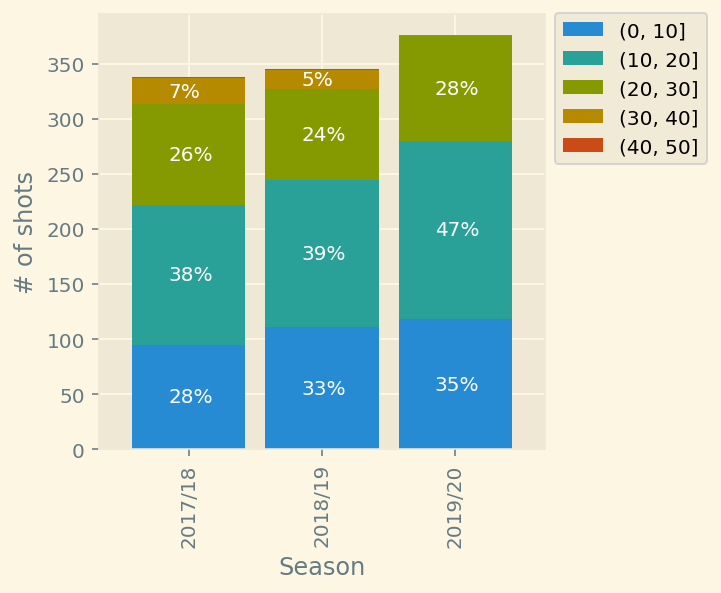

In [54]:
ax = df1.plot(kind='bar', stacked=True,width=.85, figsize=(4,4))
ax.set(ylabel='# of shots')
ax.legend(bbox_to_anchor=(1, 1.025))

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    pct = height/df1.iloc[i//5].sum()
    if pct > .04:
        ax.annotate('{:.0%}'.format(pct), (x+.27, y + height/2 -5 ), color='white', fontsize=10,)


In [140]:
pd.DataFrame([(df1.loc['2017/18']/df1.loc['2017/18'].sum()).T,
(df1.loc['2018/19']/df1.loc['2018/19'].sum()).T,
(df1.loc['2019/20']/df1.loc['2019/20'].sum()).T])

,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]"
2017/18,0.28107,0.37574,0.26923,0.07101,0.00296
2018/19,0.32174,0.38551,0.24058,0.04928,0.00290
2019/20,0.31383,0.43085,0.25266,0.00266,NaN


In [135]:
df1

,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]"
Season,,,,,
2017/18,95.0,127.0,91.0,24.0,1.0
2018/19,111.0,133.0,83.0,17.0,1.0
2019/20,118.0,162.0,95.0,1.0,NaN
